In [173]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import tensorflow as tf

In [174]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam,rmsprop,SGD
from keras.callbacks import EarlyStopping

In [175]:
def create_model(learning_rate, num_dense_layers,
                 num_dense_nodes, num_features):
# create model
    model = Sequential()
    
    model.add(Dense(num_features, activation='relu',kernel_initializer='random_uniform'))
    
    
    for i in range(num_dense_layers):
        # Name of the layer. This is not really necessary
        # because Keras should give them unique names.
        name = 'layer_dense_{0}'.format(i+1)

        # Add the dense / fully-connected layer to the model.
        # This has two hyper-parameters we want to optimize:
        # The number of nodes and the activation function.
        model.add(Dense(num_dense_nodes,
                        activation='relu',
                       name=name))
        
    model.add(Dense(1,activation='relu'))
    
    
    #Optimizer = SGD(lr=learning_rate, momentum=0.3, decay=0)
    #Optimizer=adam(lr=learning_rate,beta_1=0.98,beta_2=0.58)
    #Optimizer=rmsprop(lr=learning_rate,rho=0.90)
    # Compile model
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse'])
    
    
    return model

In [232]:
train_data=pd.read_csv('data-files/train_data.csv')
train_data.drop('Unnamed: 0',axis=1,inplace=True)

In [265]:
test_data=pd.read_csv('data-files/Season_2019.csv')
test_data.drop('Unnamed: 0',axis=1,inplace=True)

In [226]:
train_data=train_data[['Player','MPG','PER','VORP','BPM','OBPM','WS','OWS','DWS','Fantasy_PPG']]
test_data=test_data[['Player','MPG','PER','VORP','BPM','OBPM','WS','OWS','DWS']]

In [179]:
x=train_data[['MPG','PER','VORP','BPM','OBPM','WS','OWS','DWS']]
y=train_data['Fantasy_PPG']

In [180]:
x=np.asarray(x)
y=np.asarray(y).reshape(len(y),1)

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.3)

In [183]:
model=create_model(learning_rate=0.40,num_dense_layers=10,num_dense_nodes=200,num_features=len(x[0]))

In [184]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)

In [185]:
history=model.fit(x=x_train.astype(float),y=y_train.astype(float),batch_size=30, epochs=100,callbacks=[es])

Epoch 1/100
6946/6946 [==============================] - 5s 758us/step - loss: 21.6664 - mean_squared_error: 21.6664
Epoch 2/100
6946/6946 [==============================] - 3s 398us/step - loss: 4.0431 - mean_squared_error: 4.0431
Epoch 3/100
6946/6946 [==============================] - 3s 392us/step - loss: 2.4306 - mean_squared_error: 2.4306
Epoch 4/100
6946/6946 [==============================] - 3s 392us/step - loss: 2.5131 - mean_squared_error: 2.5131
Epoch 5/100
6946/6946 [==============================] - 3s 389us/step - loss: 2.4562 - mean_squared_error: 2.4562
Epoch 6/100
6946/6946 [==============================] - 3s 393us/step - loss: 2.6004 - mean_squared_error: 2.6004
Epoch 7/100
6946/6946 [==============================] - 3s 390us/step - loss: 3.3483 - mean_squared_error: 3.3483
Epoch 8/100
6946/6946 [==============================] - 3s 389us/step - loss: 2.7171 - mean_squared_error: 2.7171
Epoch 9/100
6946/6946 [==============================] - 3s 414us/step - loss:

6946/6946 [==============================] - 3s 384us/step - loss: 1.8919 - mean_squared_error: 1.8919
Epoch 72/100
6946/6946 [==============================] - 3s 392us/step - loss: 1.5572 - mean_squared_error: 1.5572
Epoch 73/100
6946/6946 [==============================] - 3s 388us/step - loss: 1.7167 - mean_squared_error: 1.7167
Epoch 74/100
6946/6946 [==============================] - 2s 306us/step - loss: 1.6236 - mean_squared_error: 1.6236
Epoch 75/100
6946/6946 [==============================] - 2s 294us/step - loss: 1.7781 - mean_squared_error: 1.7781
Epoch 76/100
6946/6946 [==============================] - 2s 345us/step - loss: 1.6003 - mean_squared_error: 1.6003
Epoch 77/100
6946/6946 [==============================] - 3s 406us/step - loss: 1.9327 - mean_squared_error: 1.9327
Epoch 78/100
6946/6946 [==============================] - 3s 394us/step - loss: 1.6194 - mean_squared_error: 1.6194
Epoch 79/100
6946/6946 [==============================] - 3s 393us/step - loss: 1.766

In [186]:
import matplotlib.pyplot as plt

Text(0,0.5,'Mean-Squared-Error')

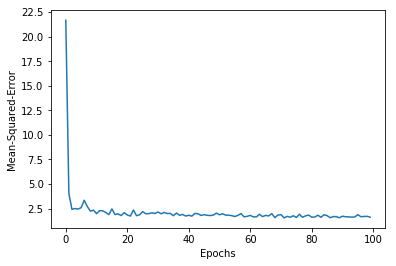

In [248]:
plt.plot(history.history['mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean-Squared-Error')

In [188]:
np.mean(np.abs(model.predict(x_test.astype(float))-y_test.astype(float)))

0.977343239834543

In [266]:
test_data.index=test_data['Player']
test_data.drop('Player',axis=1,inplace=True)
predictions=pd.DataFrame(index=test_data.index,data=model.predict(test_data))

In [267]:
predictions.sort_values(0,ascending=False,inplace=True)
predictions.rename(columns={0: 'Fantasy_PPG_Prediction'},inplace=True)

In [269]:
predictions.to_csv('2018_2019_Predictions.csv')